p_even_odd:	0.9575038225600888
h_even_odd:	0.06264984829104646
p_spoiled_even:	0.001717782532771461
h_spoiled_even:	9.18523687842473
Hello and welcome to the L-test. We use the Prime Counting function as a 
reference data set. The blue and orange dots is that many numbers, and the count
of how many primes they cover each. Even and odd number counts are not quite the 
same but they go up in a messy way like hospital data. The first probability is
the high probability that Prime Counts of even and odd prime numbers are 
samples from same population. Note the p value is more than 0.5 because the are 
in reality chosen from the same set. One half has low information realtive to 
the other. We then pertrubed one half with false Information. This dereduces
the probability they are from the same process and adds spurious information.

To get the same false difference between odd and even we need	21	false counts of 1 integer.
Spoiling evens with these gives a spoiled p of:		0.00343865098562097

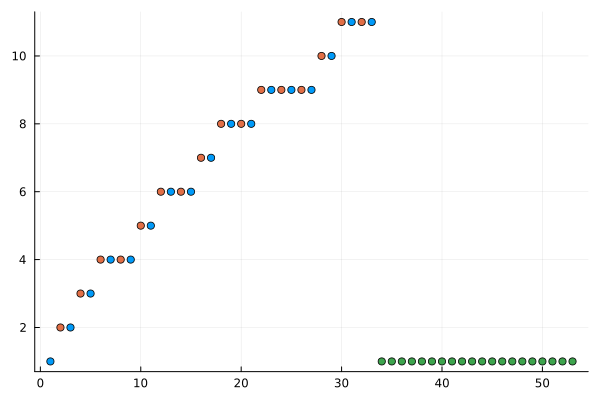




passed build primes
passed all tests


In [3]:
"""

L-TEST CODE FOR PROD ALERT 2

Copyright © 2023 Dr Keith S Reid Cailleach Computing Ltd

keithreid@nhs.net

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the “Software”), to deal in the Software without restriction, including without limitation 
the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and 
to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions 
of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED 
TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL 
THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF 
CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER 
DEALINGS IN THE SOFTWARE.

""";

using DataFrames
using Distances
using HypothesisTests
using Plots
using Primes
using Test

# cut and pasted into a getter

function get_completes()
    complete_points = [(8.939524946697924, 2.823454078334649), (9.977937435859237, 3.8573717152961056), 
        (10.751854884312458, 3.0221970596792267), (11.237719912095905, 3.6121699668476093), 
        (11.725776771413916, 3.7051445192567076), (11.88486432478257, 4.357236119688581), 
        (11.908060822341971, 4.547568840405879), (12.253606357692746, 4.518754623444718), 
        (12.322289770890732, 3.258036642892367), (12.369658549951588, 5.14492218855111), 
        (12.495935499092598, 4.899227577949129), (12.515903434402675, 4.371268640924653), 
        (12.715935046437925, 4.776469165671122), (12.808046021805348, 5.395303341049263), 
        (12.980739011059681, 5.4404654771641505), (13.006894403054764, 4.260835038681301), 
        (13.123517794465934, 5.4179204075174505), (12.771800936558762, 5.5984592674337685), 
        (13.282125722626256, 5.241617883807535), (13.461100455094979, 5.972506224751175), 
        (13.520919992391876, 6.517414719189994), (13.537233110515368, 5.826170782964766), 
        (13.540281311071704, 5.413966567244306), (13.897935730705145, 5.060143041280241), 
        (14.102331005175047, 6.885713489809345), (14.166900708644205, 6.071168716147212), 
        (14.247313584087076, 6.555228835578721), (14.2635996693782, 6.3997684140008175), 
        (14.267735553204178, 6.5582471732426635), (14.305742754265296, 7.564760901525339), 
        (14.51495137420671, 7.40580295992969), (14.623451796140243, 6.302469678454707), 
        (14.62882983651542, 7.052235853822037)]
    return complete_points 
end

function get_nulls()
    null_pasted =  [(7.141464169315353, 0.0), (7.7730761106915764, 0.0), (8.236183210283754, 0.0), 
        (8.515699838284043, 0.0), (8.779685830626283, 0.0), (8.818935912914702, 0.0), 
        (9.23995261769702, 0.0), (9.320559790788902, 0.0), (9.31458742013508, 0.0), 
        (9.688561490397314, 0.0), (9.799281621521923, 0.0), (9.977778131396771, 0.0), 
        (10.013275746201552, 0.0), (10.253281406686712, 0.0), (10.917091086254374, 0.0), 
        (11.22687375773717, 0.0), (11.806761651929797, 0.0), (12.151745915933395, 0.0), 
        (12.283467813840582, 0.0), (13.77962921302606, 0.0), (13.791750054627066, 0.0)]
    null_points = [(x[1],1) for x in null_pasted]
    return null_points
end
# configuration

function get_base_n()
    complete      = get_completes()
    base_n::Int64 = length(complete)
    return base_n
end
                    
function get_L()
    complete_points     = get_completes()

    complete_estimates  = ./([x[1] for x in complete_points],[x[2] for x in complete_points])
    odd_estimates       = [x[2] for x in enumerate(complete_estimates) if  isodd(x[1])]
    even_estimates      = [x[2] for x in enumerate(complete_estimates) if iseven(x[1])]   
    p_even_odd::Float64 = pvalue(MannWhitneyUTest(odd_estimates, even_estimates))
    h_even_odd::Float64 = (-1)*log2(p_even_odd)
    println("p_even_odd:\t", p_even_odd)
    println("h_even_odd:\t", h_even_odd)
    
    null_points         = get_nulls()
    null_estimates      = ./([x[1] for x in null_points],[x[2] for x in null_points])
    spoiled_estimates   = vcat(null_estimates, odd_estimates)
    
    p_spoiled_even::Float64 = pvalue(MannWhitneyUTest(spoiled_estimates, even_estimates))
    h_spoiled_even::Float64 = (-1)*log2(p_spoiled_even)
    println("p_spoiled_even:\t", p_spoiled_even)
    println("h_spoiled_even:\t", h_spoiled_even)
    
    L                   = h_spoiled_even
    return L
end



# model

function build_count_primes(primes::Vector{Int64})
    base_n::Int64               = get_base_n()
    count_primes::Vector{Int64} = []
    for i in 2:base_n+1
    prime_count::Int64 = sum([Int(isprime(x)) for x in 1:i])
        push!(count_primes, prime_count)
    end
    return count_primes
end

function build_primes(base_n::Int64)
    primes::Vector{Int64} = [prime(i) for i in 2:base_n+1]
    return primes
end

function build_xs_over_log_xs(base_n::Int64)
    xs_over_log_xs::Vector{Float64} = [x/log(x) for x in 2:base_n+1]
    return xs_over_log_xs
end

# view

function draw_my_graph(odd_ys::Vector{Tuple{Int64,Int64}},
                  even_ys::Vector{Tuple{Int64,Int64}},
             claim_xs::Vector{Int64},
                 ones_claimed::Int64) 
    my_graph = scatter([x[1] for x in odd_ys], [x[2] for x in odd_ys], legend=false)
    my_graph = scatter!([x[1] for x in even_ys],[x[2] for x in even_ys])
    my_graph = scatter!(claim_xs, ones(ones_claimed))
    display(my_graph)
end


function greet(base_n::Int64, p_even_odd::Float64, h_even_odd::Float64, L::Float64)
    println("""
Hello and welcome to the L-test. We use the Prime Counting function as a 
reference data set. The blue and orange dots is that many numbers, and the count
of how many primes they cover each. Even and odd number counts are not quite the 
same but they go up in a messy way like hospital data. The first probability is
the high probability that Prime Counts of even and odd prime numbers are 
samples from same population. Note the p value is more than 0.5 because the are 
in reality chosen from the same set. One half has low information realtive to 
the other. We then pertrubed one half with false Information. This dereduces
the probability they are from the same process and adds spurious information.""")
end

function report_finding(ones_claimed::Int64,
                              spoiled_p::Float64,
                   spoiled_h::Float64,
                  h_even_odd::Float64,
                comparator_L::Float64)
    println("\nTo get the same false difference between odd and even we need\t", ones_claimed, "\tfalse counts of 1 integer.")
    println("Spoiling evens with these gives a spoiled p of:\t\t", spoiled_p)
    println("Which is an absolute increase in disinformation of:\t", spoiled_h - h_even_odd)
    println("And a prime count disinformation ratio of:\t\t", comparator_L)    
   end



# control

function Ltest()
    
    base_n::Int64                   = get_base_n()
    primes::Vector{Int64}           = build_primes(base_n)
    count_primes::Vector{Int64}     = build_count_primes(primes)
    estimates                       = ./(count_primes, 1:base_n)
    distances::Vector{Float64}      = []
    first = [1,count_primes[1]]
    for i in 1:length(count_primes)
        value         = count_primes[i]
        this_point    = [i,value]
        this_distance = euclidean(first, this_point)
        push!(distances, this_distance)
    end

    L::Float64                          = get_L()
    points_frame::DataFrame             = DataFrame(x=1:base_n,
                                                    y=count_primes,
                                             distance=distances,
                                             estimate=estimates)
    points_frame                        = sort!(points_frame,[:distance])
    y_positions::Vector{Int64}          = points_frame.y   
    odd_ys::Vector{Tuple{Int64,Int64}}  = [x for x in enumerate(y_positions) if isodd(x[1])]
    even_ys::Vector{Tuple{Int64,Int64}} = [x for x in enumerate(y_positions) if iseven(x[1])]   
    sorted_estimates::Vector{Float64}   = points_frame.estimate   
    odd_estimates::Vector{Float64}      = [x[2] for x in enumerate(sorted_estimates) if isodd(x[1])]
    even_estimates::Vector{Float64}     = [x[2] for x in enumerate(sorted_estimates) if iseven(x[1])]
    p_even_odd::Float64                 = pvalue(MannWhitneyUTest(odd_estimates, even_estimates))
    h_even_odd::Float64                 = (-1)*log2(p_even_odd)
    greet(base_n, p_even_odd, h_even_odd, L) 
    ones_claimed::Int64   = 1
    comparator_L::Float64 = 0
    while comparator_L <= L 
        first_claim::Int64               = base_n + 1
        final_claim::Int64               = base_n + ones_claimed
    claim_xs::Vector{Int64}          = first_claim:final_claim
    claim_estimates::Vector{Float64} = ./(1, claim_xs)
    if ones_claimed     > 0 
        spoiled_evens::Vector{Float64}   = append!(even_estimates, claim_estimates[end])
    else
        spoiled_evens                    = even_estimates
        end
        spoiled_p::Float64    = pvalue(MannWhitneyUTest(odd_estimates, spoiled_evens))
        spoiled_h::Float64    = (-1)*log2(spoiled_p)
    comparator_L          = (spoiled_h - h_even_odd) / h_even_odd 
        ones_claimed          = ones_claimed + 1
        if comparator_L > L
            report_finding(ones_claimed, spoiled_p, spoiled_h, h_even_odd, comparator_L)
        draw_my_graph(odd_ys, even_ys, claim_xs, ones_claimed)
        return ones_claimed
        end
    end
end


Ltest()

# test

function test_build_count_primes()
    base_n::Int64                = get_base_n()
    primes::Vector{Int64}        = build_primes(base_n)
    count_primes  = build_count_primes(primes) 
    @test typeof(count_primes)    == Vector{Int64}
    @test typeof(count_primes[1]) == Int64
    @test length(count_primes)    == base_n
    println("passed build count")
end

function test_build_primes()
    base_n          = get_base_n()
    primes          = build_primes(base_n)
    @test typeof(primes) == Vector{Int64}
    @test primes[1]      == 3
    @test length(primes) == base_n
    println("passed build primes")
end

function Ltest_tests()
    println("\n\n")
    test_build_primes()
    println("passed all tests")
end
Ltest_tests()

p_even_odd:	0.9575038225600888
h_even_odd:	0.06264984829104646
p_spoiled_even:	0.001717782532771461
h_spoiled_even:	9.18523687842473
You have 33 data points.
If I toss 33 coins for 33 trials,

The resulting series can be divided into alternate odd and even trials.

The two halves are each an honest but inexact estimate of coin toss probability, around 50%
The two halves should be pretty similar and have a fairly high p under Mann Whitney U test.

In this case of 33 tosses each the probability the two halves are the same is:	88.40963514952273%
The even half adds tiny amount of information to the odd half, less than a bit:	0.1777244874319295

But your data on providers has questionable added suprise between odd and even+null.

Added by some null reports from aliens adding bits, in a ratio of 9.18523687842473

To get the same ratio of surprise we can add questionable "all tails" reports to evens until we get the same ratio.
We needed to claim these successive trials were all tails and eve

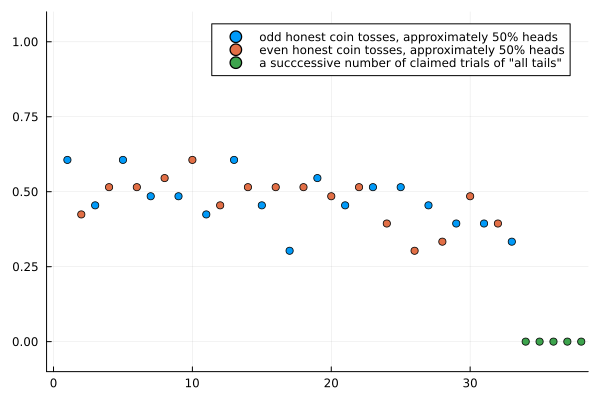




...just running some housekeeping tests
passed build estimates
passed all tests


In [5]:
function build_toss_estimates(base_n::Int64)
    rng                             = MersenneTwister(314)
    toss_estimates::Vector{Float64} = []
    for i in 1:base_n
        tosses   = bitrand(rng, base_n)
        estimate = mean(tosses)
        push!(toss_estimates, estimate)
    end
    return toss_estimates
end

function toss_Ltest()
    base_n          = get_base_n()
    L               = get_L()
    
    toss_estimates  = build_toss_estimates(base_n)
    
    odd_points      = [x for x in enumerate(toss_estimates) if  isodd(x[1])]
    even_points     = [x for x in enumerate(toss_estimates) if iseven(x[1])]
    
    odd_estimates   = [x[2] for x in  odd_points]
    even_estimates  = [x[2] for x in even_points]
    
    chance_are_same = pvalue(MannWhitneyUTest(odd_estimates, even_estimates))
    interhalf_info  = -log2(chance_are_same)
    
    println("You have ", base_n, " data points.")
    println("If I toss ", base_n," coins for ", base_n, " trials,")
    println("\nThe resulting series can be divided into alternate odd and even trials.\n")
    println("The two halves are each an honest but inexact estimate of coin toss probability, around 50%")
    println("The two halves should be pretty similar and have a fairly high p under Mann Whitney U test.")
    println("\nIn this case of ", base_n, " tosses each the probability the two halves are the same is:\t", 100*chance_are_same,"%")
    println("The even half adds tiny amount of information to the odd half, less than a bit:\t", interhalf_info)
    println("\nBut your data on providers has questionable added suprise between odd and even+null.")
    println("\nAdded by some null reports from aliens adding bits, in a ratio of ", L)
    println("\nTo get the same ratio of surprise we can add questionable \"all tails\" reports to evens until we get the same ratio.")
    
    fake_tails_claimed = 0
    loop_evens         = copy(even_estimates)
    proferred_L        = 0
    while proferred_L < L
        fake_tails_claimed += 1
        push!(loop_evens, 0)
        spoiled_p     = pvalue(MannWhitneyUTest(odd_estimates, loop_evens))
        spoiled_h     = -log2(spoiled_p)
        proferred_L   = (spoiled_h - interhalf_info) / interhalf_info
        if proferred_L >= L
            trailing_0s = (base_n+1):(base_n+1+fake_tails_claimed)
            println("We needed to claim these successive trials were all tails and even:\t", fake_tails_claimed)
            println("Which you can see on the graph are this many trials:\t\t\t", trailing_0s)
            println("They are precisely claiming they always got tails as against the ", base_n, " accurate but imprecise reports.")
            tossg           = scatter( [x[1] for x in odd_points], 
                               [x[2] for x in odd_points],
                                                            label="odd honest coin tosses, approximately 50% heads",
                                                            xlims=(-0.5,base_n+fake_tails_claimed+0.5), 
                                                            ylims=(-0.1,1.1))
    
            tossg           = scatter!([x[1] for x in even_points], 
                               [x[2] for x in even_points], label="even honest coin tosses, approximately 50% heads")
            tossg           = scatter!(collect(trailing_0s),zeros(fake_tails_claimed),
                                                            label="a succcessive number of claimed trials of \"all tails\"")
            
            display(tossg)
        end
        
    end
end

toss_Ltest()

function test_build_toss_estimates()
    for n in 1:40
        toss_estimates = build_toss_estimates(n)
        @test typeof(toss_estimates)    == Vector{Float64}
        @test length(toss_estimates)    == n
        @test 0 <= toss_estimates[1]    <= 1.0
        @test typeof(toss_estimates[1]) == Float64
    end
    println("passed build estimates")
end

function toss_tests()
    println("\n\n\n...just running some housekeeping tests")
    test_build_toss_estimates()
    println("passed all tests")
end

toss_tests()